In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
import warnings
warnings.simplefilter("ignore")

plt.rcParams['figure.figsize'] = (20, 10)

In [30]:
t = Table.read('/home/aalvarez/Work/Data/sim11/sim11_multi_cat.fits')

In [31]:
t.columns['world_centroid_alpha'].unit = u.deg
t.columns['world_centroid_delta'].unit = u.deg

In [32]:
snr = (t['isophotal_flux'] / t['isophotal_flux_err']) > 10
t = t[snr]

In [33]:
print(t['flux_growth'].shape)
print(t['flux_growth_step'].shape)
print(t['flux_radius'].shape)
nframes = t['flux_growth_step'].shape[1]

(740, 10, 32)
(740, 10)
(740, 10, 3)


In [34]:
growth_nsteps = t['flux_growth'].shape[-1]
print(growth_nsteps)

32


In [35]:
idxs = [55, 68, 50, 95, 0]

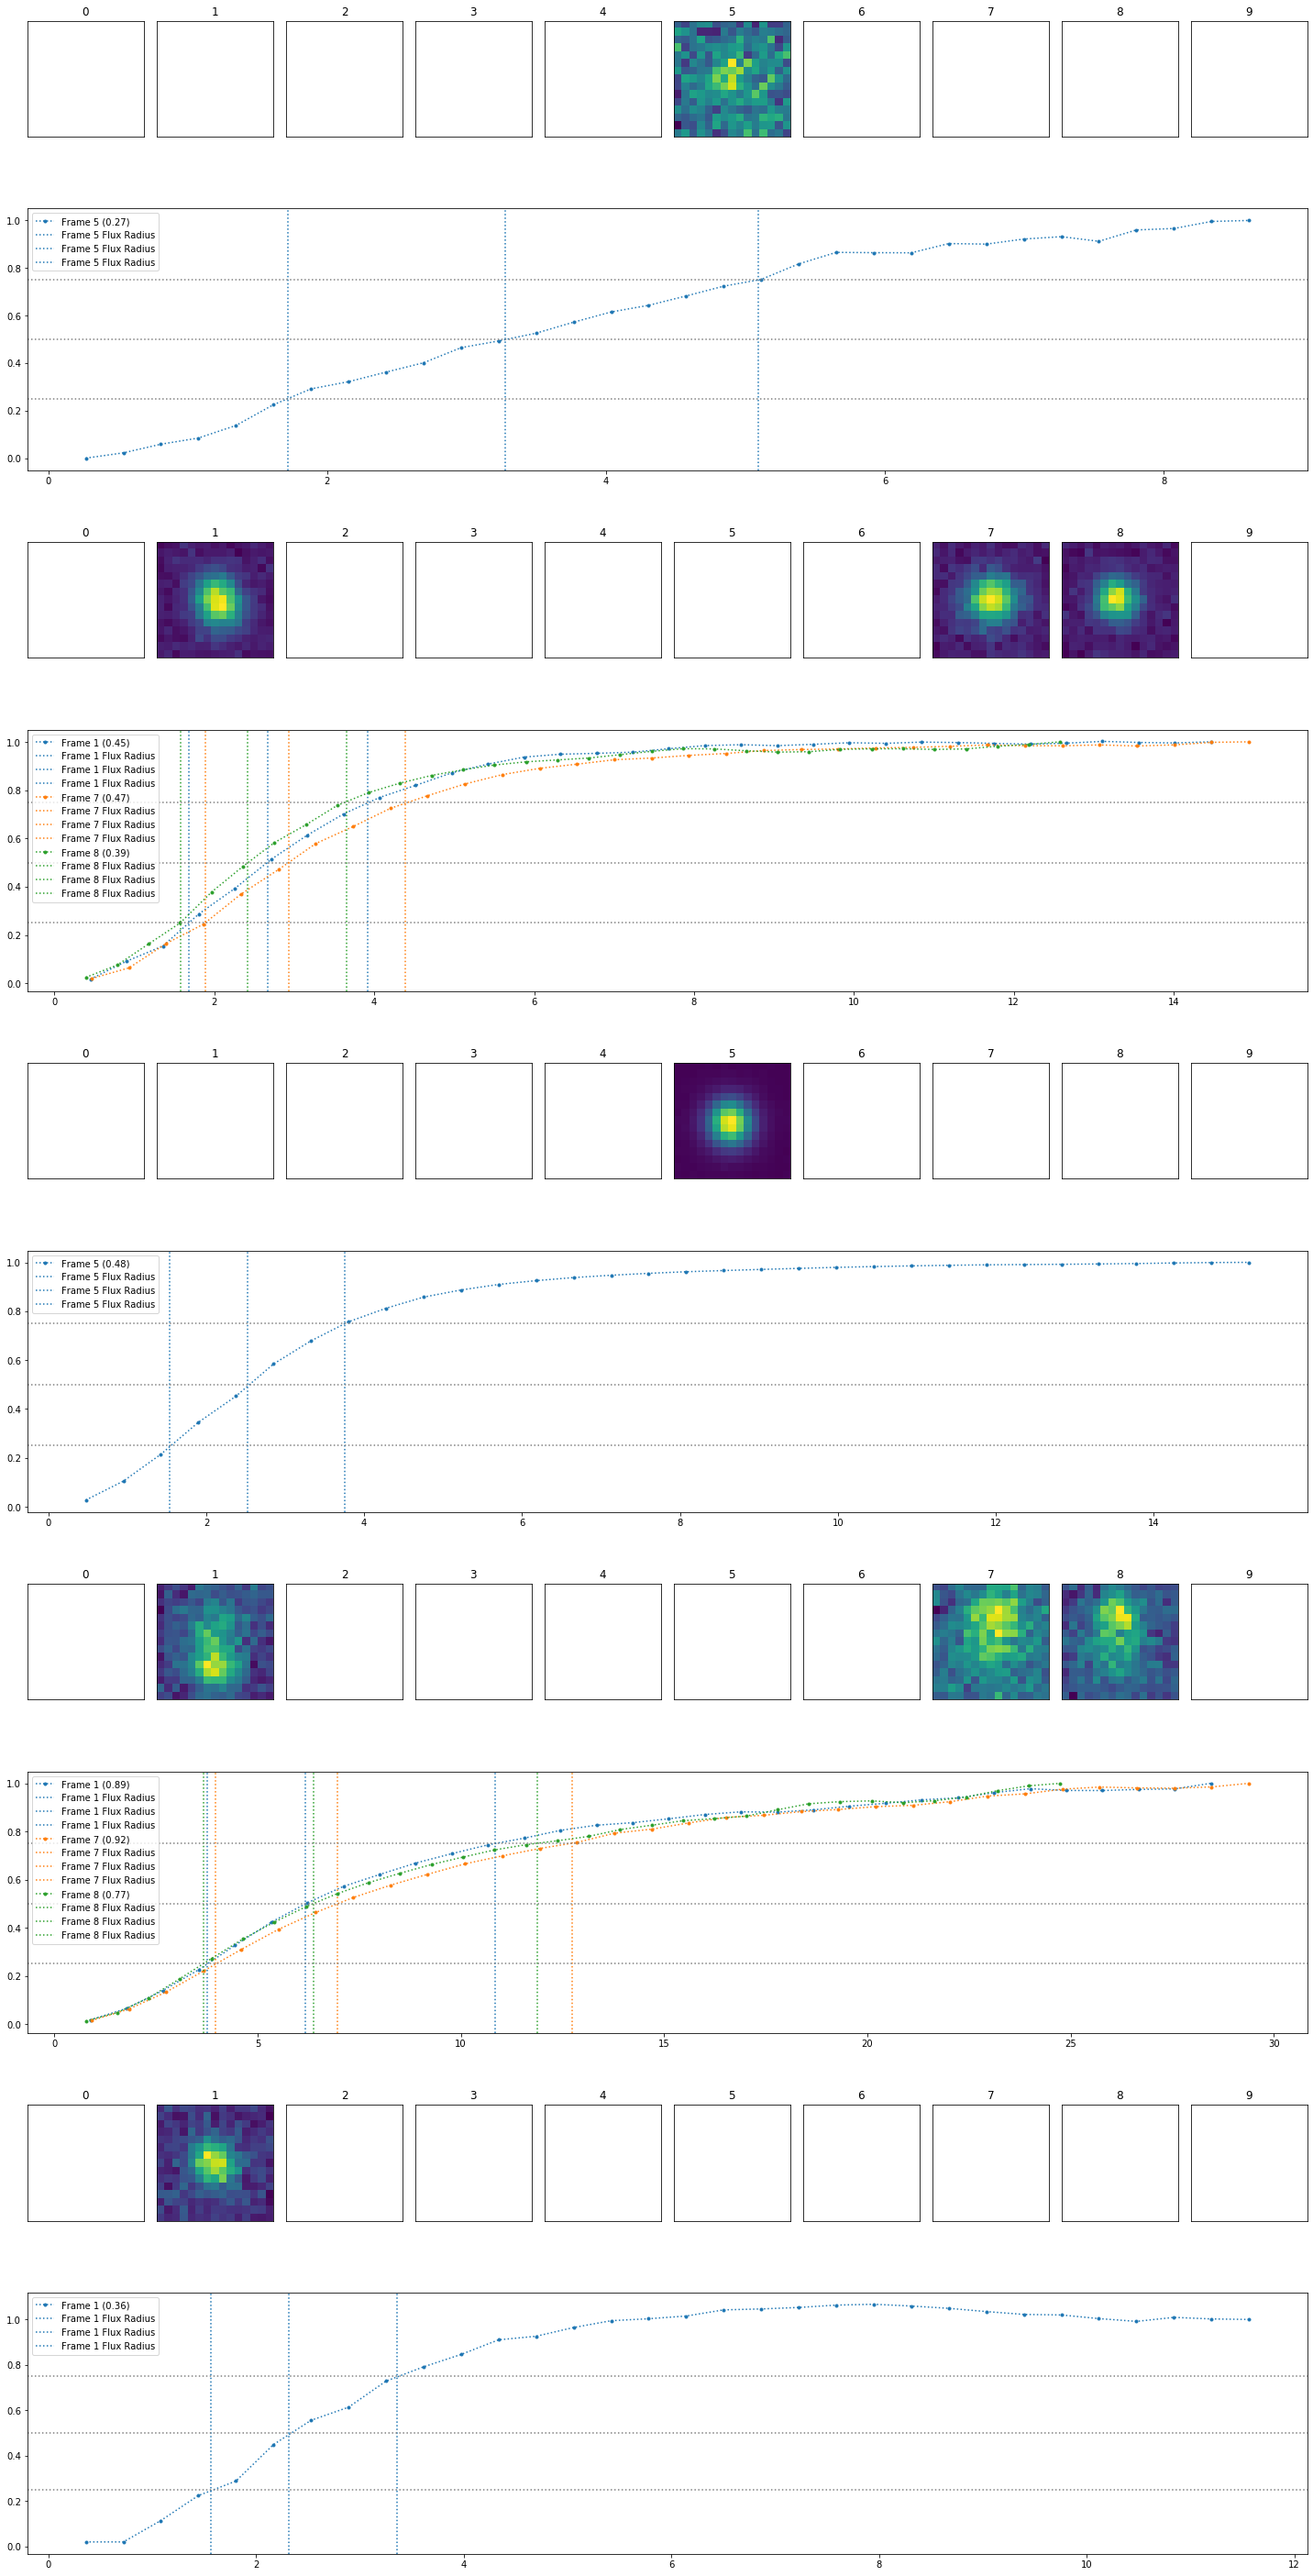

In [38]:
fig = plt.figure(constrained_layout=True, figsize=(20, 8*len(idxs)))
grid = GridSpec(ncols=nframes, nrows = len(idxs) * 2)

for i, idx in enumerate(idxs):
    obj = t[idx]
    growth_ax = fig.add_subplot(grid[i * 2 + 1, :])
    for j in range(nframes):
        growth_step = obj['flux_growth_step'][j]
        growth_px = np.arange(1, growth_nsteps + 1) * growth_step
        img_ax = fig.add_subplot(grid[i * 2, j])
        img_ax.set_title(j)
        img_ax.set_xticks([])
        img_ax.set_yticks([])
        img_ax.imshow(obj['vignet'][j])
        if not np.all(obj['flux_growth'][j] == 0):
            p = growth_ax.plot(growth_px, obj['flux_growth'][j]/obj['flux_growth'][j][-1], '.:', label=f'Frame {j} ({growth_step:.2f})')
            if obj['flux_radius'][j].shape[0] == 1:
                if not np.isnan(obj['flux_radius'][j]):
                    growth_ax.axvline(obj['flux_radius'][j], linestyle=':', label=f'Frame {j} Flux Radius', c=p[0].get_color())
            else:
                for r in obj['flux_radius'][j]:
                    if not np.isnan(r):
                        growth_ax.axvline(r, linestyle=':', label=f'Frame {j} Flux Radius', c=p[0].get_color())
    growth_ax.axhline(0.25, linestyle=':', c='gray')
    growth_ax.axhline(0.5, linestyle=':', c='gray')
    growth_ax.axhline(0.75, linestyle=':', c='gray')
    growth_ax.legend()
        
plt.tight_layout()
plt.show()